## Visualizing Data with Pandas and MatPlotLib

#### Be sure to review the **Project Framework Document** for more information about this assignment!
</br>

### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [2]:
ufo_df = pd.read_csv("ufo_sightings.csv", index_col="#")
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64683 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            64683 non-null  object 
 1   City                 64683 non-null  object 
 2   State/Province       59973 non-null  object 
 3   Country              56927 non-null  object 
 4   UFO_Shape            63124 non-null  object 
 5   Length_of_Encounter  64683 non-null  float64
 6   Described_Duration   64683 non-null  object 
 7   Description          64668 non-null  object 
 8   Date_Documented      64683 non-null  object 
 9   Latitude             64683 non-null  float64
 10  Longitude            64683 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.9+ MB


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [3]:
ufo_df.info()
nonnull_df = ufo_df.dropna()
nonnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64683 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            64683 non-null  object 
 1   City                 64683 non-null  object 
 2   State/Province       59973 non-null  object 
 3   Country              56927 non-null  object 
 4   UFO_Shape            63124 non-null  object 
 5   Length_of_Encounter  64683 non-null  float64
 6   Described_Duration   64683 non-null  object 
 7   Description          64668 non-null  object 
 8   Date_Documented      64683 non-null  object 
 9   Latitude             64683 non-null  float64
 10  Longitude            64683 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               ----

### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [4]:
filtered_df = nonnull_df.drop(["Described_Duration","Description", "Date_Documented"], axis=1)
filtered_df.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [5]:
filtered_df["Date_Time"] = pd.to_datetime(filtered_df["Date_Time"])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_Time            53562 non-null  datetime64[ns]
 1   City                 53562 non-null  object        
 2   State/Province       53562 non-null  object        
 3   Country              53562 non-null  object        
 4   UFO_Shape            53562 non-null  object        
 5   Length_of_Encounter  53562 non-null  float64       
 6   Latitude             53562 non-null  float64       
 7   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


## Data Visualization with MatPlotLib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **MatPlotLib Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

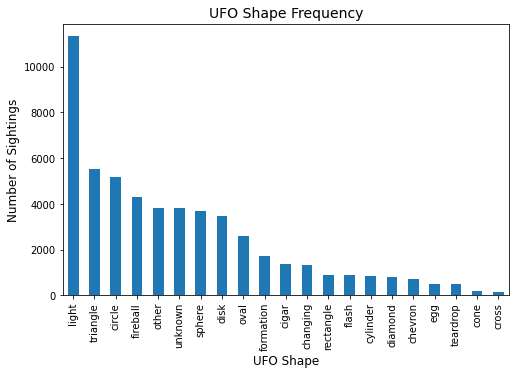

In [6]:
filtered_df.nunique()
shape_count = filtered_df["UFO_Shape"].value_counts()
ufo_shape_plot = shape_count.plot(kind='bar', figsize=(8,5))
# One way to set title
#ufo_shape_plot.set_title("UFO Shape Frequency")
# Another way to set title
plt.title("UFO Shape Frequency", fontsize=14)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xlabel("UFO Shape", fontsize=12)
plt.show()

##### 💡**Digging Deeper:** Based on your visualization, which UFO shape is most frequently reported?  Which shape is least frequently reported? 💡
</br>

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **MatPlotLib Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

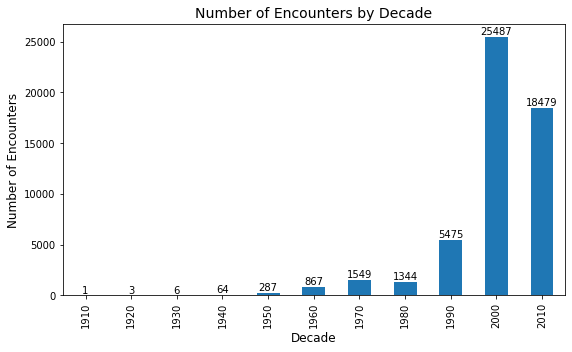

In [7]:
filtered_df["Year"] = filtered_df["Date_Time"].dt.year #Create new series of Year of Encounter
filtered_df["Decade"] = (10 * (filtered_df["Year"] // 10)) #.astype(str) + "'s"
# print(filtered_df["Decade"].value_counts())
decade_bar_plot = filtered_df["Decade"].value_counts().sort_index().plot(kind="bar",figsize=(9,5))
decade_bar_plot.bar_label(decade_bar_plot.containers[0])
decade_bar_plot.set_title("Number of Encounters by Decade", fontsize=14)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Encounters", fontsize=12)
plt.show()

##### 💡**Digging Deeper:** Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns? 💡
</br>

### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **MatPlotLib Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

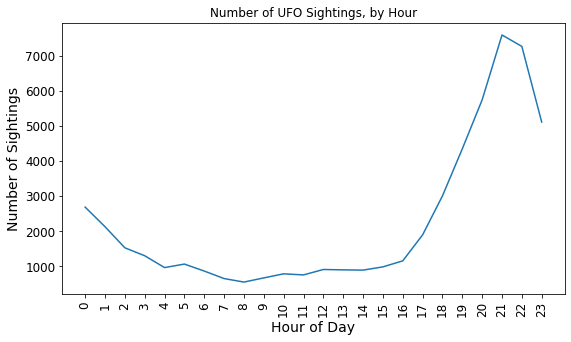

In [8]:
filtered_df.head()
# Create new data frame, with index col as hour of day, 
plt.figure()
filtered_df["Hour"] = filtered_df["Date_Time"].dt.hour
series = filtered_df["Hour"].value_counts().sort_index()
plotted_hours = series.plot(kind="line", title="Number of UFO Sightings, by Hour",figsize=(9,5))
plt.xticks(series.index, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Number of Sightings", fontsize=14)
plt.show()
#Alternative approach, similar outcome
#hour_df = filtered_df.groupby('Hour').size().plot()
#hour_df.set_title("Number of UFO Sightings, by Hour")

##### 💡**Digging Deeper:** Based on your visualization, what times of the day have the highest number of UFO sightings? Are there other factors that may account for this pattern in the data? 💡
</br>

### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **MatPlotLib Stacked Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

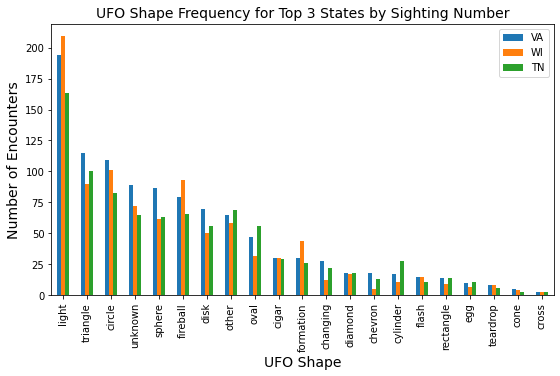

In [9]:
# First group by State/Province, and find the highest count
filtered_df["State/Province"].value_counts()
# Highest frequency is CA with 7135 sightings, followed by FL with 3258, then WA with 2894
# Need to wrap query in backticks as it has a / in the name
california = filtered_df.query('`State/Province` == "VA"')
ca_counts = california["UFO_Shape"].value_counts()
ca_counts.name = "VA"


florida = filtered_df.query('`State/Province` == "WI"')
fl_counts = florida["UFO_Shape"].value_counts()
fl_counts.name = "WI"

washington = filtered_df.query('`State/Province` == "TN"')
wa_counts = washington["UFO_Shape"].value_counts()
wa_counts.name = "TN"

top_three_df = pd.concat([ca_counts, fl_counts, wa_counts], axis=1)
plotted_top_three = top_three_df.plot(kind="bar",figsize=(9,5))
plt.title("UFO Shape Frequency for Top 3 States by Sighting Number", fontsize=14)
plt.xlabel("UFO Shape", fontsize=14)
plt.ylabel("Number of Encounters", fontsize=14)
plt.show()
# X axis as shape of UFO, Y axis as number of value counts for each, for each state
# New DF, shape as index, state as column, value as frequency of that shape (value count)


### **Bonus 2:** As a Data Analyst, I want to create my *own* analysis question for this data set, and utilize Pandas and MatPlotLib to draw a conclusion to that question based on my findings.
* 